In [68]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import UnivariateSpline

import numpy as np
import math
# Specify the file path


def calculate_surface_roughness_mean(x_coordinates, y_coordinates):
    # Convert coordinates to NumPy arrays
    x = np.array(x_coordinates)
    y = np.array(y_coordinates)

    # Calculate the total number of points
    num_points = len(x)

    # Calculate the average distance between consecutive points
    average_distance = np.mean(np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2))

    # Calculate the difference between the actual distance and the average distance for each point
    differences = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2) - average_distance

    # Calculate the root mean square (RMS) of the differences
    surface_roughness = np.sqrt(np.mean(differences**2))

    return surface_roughness

def calculate_surface_roughness_interpolate(x, y, smoothing_factor):
    # Fit a smoothed curve to the boundary
    t = np.arange(len(x))
    spl = UnivariateSpline(t, x, k=smoothing_factor)
    smooth_x = spl(t)
    spl = UnivariateSpline(t, y, k=smoothing_factor)
    smooth_y = spl(t)

    # Calculate the deviation of each point from the smoothed curve
    deviations = np.sqrt((x - smooth_x) ** 2 + (y - smooth_y) ** 2)

    # Calculate the average surface roughness
    surface_roughness = np.mean(deviations)
    return surface_roughness, smooth_x, smooth_y
def calculate_surface_roughness_time_avg(x, y, window_size):
    # Calculate the time average of points using a sliding window
    smooth_x = np.convolve(x, np.ones(window_size)/window_size, mode='valid')
    smooth_y = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

    # Calculate the deviation of each point from the time-averaged curve
    deviations = np.sqrt((x[window_size-1:] - smooth_x) ** 2 + (y[window_size-1:] - smooth_y) ** 2)

    # Calculate the average surface roughness
    surface_roughness = np.mean(deviations)
    return surface_roughness, smooth_x, smooth_y


def final_function(file_path):
    

    # Read the tab-delimited file into a DataFrame
    data = pd.read_csv(file_path, delimiter='\t')
    data
    num_columns = data.shape[1]
    # Display the DataFrame
    #%matplotlib widget
    x_coords=[]
    y_coords=[]
    for i in range(num_columns):
        if i%2==0 or i==0:
            x = data.iloc[:, i].tolist()
        
            x_coords.append(x)
        else:
            y=data.iloc[:, i].tolist()
            y_coords.append(y)
    #for i in range(len(x_coords)):
        #plt.scatter(x_coords[i],y_coords[i],s=0.01)
    #plt.show()
    
    x_store = [[value for value in sublist if not math.isnan(value)] for sublist in x_coords]
    y_store = [[value for value in sublist if not math.isnan(value)] for sublist in y_coords]


    roughness_mean_store=[]
    roughness_interpolate_store=[]
    roughness_time_avg_store=[]
    for i in range(len(x_store)):
        x_list =x_store[i]
        y_list =y_store[i]
    
        smoothing = 5  # Smoothing factor, adjust as needed
        window_size = 100
    
        roughness_mean = calculate_surface_roughness_mean(x_list, y_list)
        roughness_interpolate, smooth_x, smooth_y = calculate_surface_roughness_interpolate(x_list, y_list, smoothing)
        roughness_time_avg, smooth_x, smooth_y = calculate_surface_roughness_time_avg(x_store[i], y_store[i], window_size)
    
        roughness_mean_store.append(roughness_mean)
        roughness_interpolate_store.append(roughness_interpolate)
        roughness_time_avg_store.append(roughness_time_avg)
    
    #%matplotlib widget
    fig, axs = plt.subplots(2, 1, figsize=(3, 4))

    # Plot roughness_mean_store
    axs[0].plot(roughness_mean_store)
    axs[0].set_title('Roughness Mean Store')

    # Plot roughness_interpolate_store
    #axs[1].plot(roughness_interpolate_store)
    #axs[1].set_title('Roughness Interpolate Store')

    # Plot roughness_time_avg_store
    axs[1].plot(roughness_time_avg_store)
    axs[1].set_title('Roughness Time Avg Store')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()
    
    return   roughness_time_avg_store



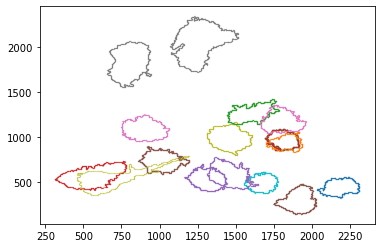

In [69]:
file_path = 'XY_Coordinatescsv3.txt'

# Read the tab-delimited file into a DataFrame
data = pd.read_csv(file_path, delimiter='\t')
num_columns = data.shape[1]
# Display the DataFrame
#(data)

x_coords=[]
y_coords=[]
for i in range(num_columns):
    if i%2==0 or i==0:
        x = data.iloc[:, i].tolist()
        
        x_coords.append(x)
    else:
        y=data.iloc[:, i].tolist()
        y_coords.append(y)
        #print(y)
    
for i in range(len(x_coords)):
    plt.scatter(x_coords[i],y_coords[i],s=0.01)
plt.show()
    
x_store = [[value for value in sublist if not math.isnan(value)] for sublist in x_coords]
y_store = [[value for value in sublist if not math.isnan(value)] for sublist in y_coords]


In [70]:
# Calculate the best-fit line using linear regression


n=18
x_list =x_store[n]
y_list =y_store[n]

roughness_mean = calculate_surface_roughness_mean(x_list, y_list)
print("Surface roughness:", roughness_mean)

Surface roughness: 0.1900094520094125


Surface roughness: 1.1934480448174376


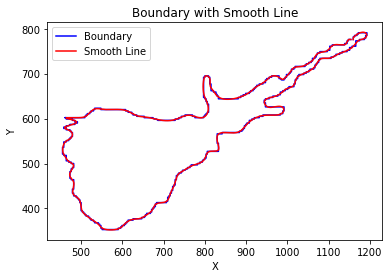

In [71]:

smoothing = 5  # Smoothing factor, adjust as needed

roughness, smooth_x, smooth_y = calculate_surface_roughness_interpolate(x_list, y_list, smoothing)
print(f"Surface roughness: {roughness}")

# Plot the original boundary and the smooth line
plt.plot(x_list, y_list, 'b-', label='Boundary')
plt.plot(smooth_x, smooth_y, 'r-', label='Smooth Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boundary with Smooth Line')
plt.show()

Surface roughness: 76.698381462547


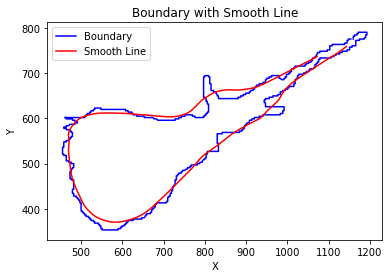

In [72]:


window_size = 80
# Adjust the window size as needed

roughness, smooth_x, smooth_y = calculate_surface_roughness_time_avg( x_list,  y_list, window_size)
print(f"Surface roughness: {roughness}")

# Plot the original boundary and the smooth line
plt.plot(x_list, y_list, 'b-', label='Boundary')
plt.plot(smooth_x, smooth_y, 'r-', label='Smooth Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boundary with Smooth Line')
plt.show()




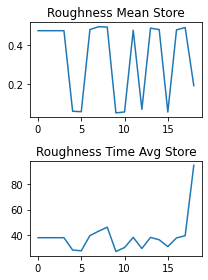

In [73]:
roughness_mean_store=[]
roughness_interpolate_store=[]
roughness_time_avg_store=[]
for i in range(len(x_store)):
    x_list =x_store[i]
    y_list =y_store[i]
    
    smoothing = 5  # Smoothing factor, adjust as needed
    window_size = 100
    
    roughness_mean = calculate_surface_roughness_mean(x_list, y_list)
    roughness_interpolate, smooth_x, smooth_y = calculate_surface_roughness_interpolate(x_list, y_list, smoothing)
    roughness_time_avg, smooth_x, smooth_y = calculate_surface_roughness_time_avg(x_store[i], y_store[i], window_size)
    
    roughness_mean_store.append(roughness_mean)
    roughness_interpolate_store.append(roughness_interpolate)
    roughness_time_avg_store.append(roughness_time_avg)
    

fig, axs = plt.subplots(2, 1, figsize=(3, 4))

# Plot roughness_mean_store
axs[0].plot(roughness_mean_store)
axs[0].set_title('Roughness Mean Store')

# Plot roughness_interpolate_store
#axs[1].plot(roughness_interpolate_store)
#axs[1].set_title('Roughness Interpolate Store')

# Plot roughness_time_avg_store
axs[1].plot(roughness_time_avg_store)
axs[1].set_title('Roughness Time Avg Store')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

(array([0.04720233, 0.07867055, 0.01573411, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00786705]),
 array([27.47590885, 34.16603363, 40.85615841, 47.54628319, 54.23640797,
        60.92653275, 67.61665754, 74.30678232, 80.9969071 , 87.68703188,
        94.37715666]),
 <BarContainer object of 10 artists>)

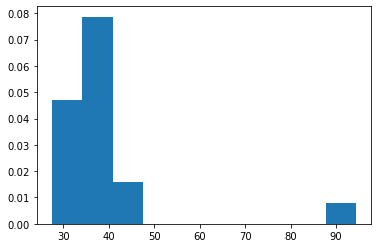

In [74]:

WT_perm_syn_actin_roughness=roughness_time_avg_store
plt.hist(WT_perm_syn_actin_roughness,bins=10,density=True)

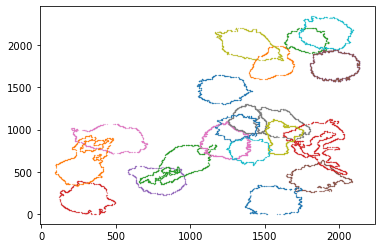

In [75]:
file_path = 'ck666_perm_syn_actin.txt'

# Read the tab-delimited file into a DataFrame
data = pd.read_csv(file_path, delimiter='\t')
data
num_columns = data.shape[1]
# Display the DataFrame

x_coords=[]
y_coords=[]
for i in range(num_columns):
    if i%2==0 or i==0:
        x = data.iloc[:, i].tolist()
        
        x_coords.append(x)
    else:
        y=data.iloc[:, i].tolist()
        y_coords.append(y)
        
    
for i in range(len(x_coords)):
    plt.scatter(x_coords[i],y_coords[i],s=0.01)
plt.show()
    
x_store = [[value for value in sublist if not math.isnan(value)] for sublist in x_coords]
y_store = [[value for value in sublist if not math.isnan(value)] for sublist in y_coords]


Surface roughness: 37.07647913773853


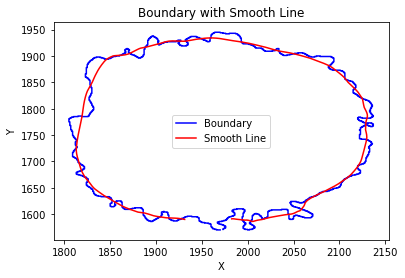

In [76]:

n=15
x_list =x_store[n]
y_list =y_store[n]
window_size = 80
# Adjust the window size as needed

roughness, smooth_x, smooth_y = calculate_surface_roughness_time_avg( x_list,  y_list, window_size)
print(f"Surface roughness: {roughness}")

# Plot the original boundary and the smooth line
plt.plot(x_list, y_list, 'b-', label='Boundary')
plt.plot(smooth_x, smooth_y, 'r-', label='Smooth Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boundary with Smooth Line')
plt.show()

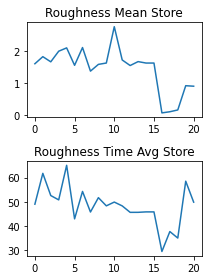

In [77]:
roughness_mean_store=[]
roughness_interpolate_store=[]
roughness_time_avg_store=[]
for i in range(len(x_store)):
    x_list =x_store[i]
    y_list =y_store[i]
    
    smoothing = 5  # Smoothing factor, adjust as needed
    window_size = 100
    
    roughness_mean = calculate_surface_roughness_mean(x_list, y_list)
    roughness_interpolate, smooth_x, smooth_y = calculate_surface_roughness_interpolate(x_list, y_list, smoothing)
    roughness_time_avg, smooth_x, smooth_y = calculate_surface_roughness_time_avg(x_store[i], y_store[i], window_size)
    
    roughness_mean_store.append(roughness_mean)
    roughness_interpolate_store.append(roughness_interpolate)
    roughness_time_avg_store.append(roughness_time_avg)
    

fig, axs = plt.subplots(2, 1, figsize=(3, 4))

# Plot roughness_mean_store
axs[0].plot(roughness_mean_store)
axs[0].set_title('Roughness Mean Store')

# Plot roughness_interpolate_store
#axs[1].plot(roughness_interpolate_store)
#axs[1].set_title('Roughness Interpolate Store')

# Plot roughness_time_avg_store
axs[1].plot(roughness_time_avg_store)
axs[1].set_title('Roughness Time Avg Store')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
ck666_perm_syn_actin_roughness=roughness_time_avg_store

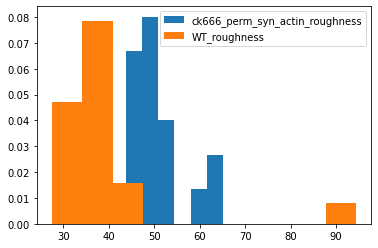

In [78]:
plt.hist(ck666_perm_syn_actin_roughness,bins=10,density=True)
plt.hist(WT_perm_syn_actin_roughness,bins=10,density=True)
plt.legend(['ck666_perm_syn_actin_roughness','WT_roughness'])
plt.show()

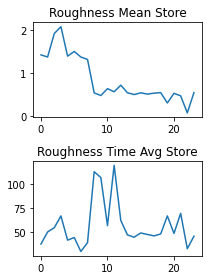

In [79]:
SMIHF2_perm_syn_actin_roughness=final_function('SMIHF2_perm_syn_actin.txt')


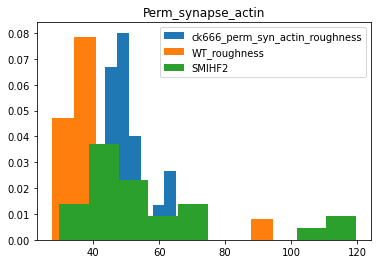

In [80]:


plt.hist(ck666_perm_syn_actin_roughness,bins=10,density=True)
plt.hist(WT_perm_syn_actin_roughness,bins=10,density=True)
plt.hist(SMIHF2_perm_syn_actin_roughness,bins=10,density=True)
plt.legend(['ck666_perm_syn_actin_roughness','WT_roughness','SMIHF2'])
plt.title('Perm_synapse_actin')
plt.show()

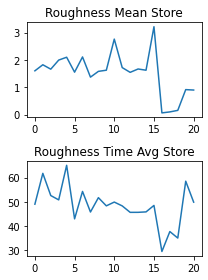

In [81]:
ck666_perm_syn_CD45_roughness=final_function('Ck666_perm_syn_CD45.txt')

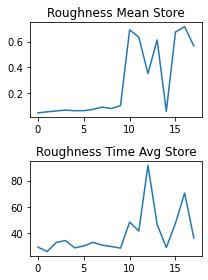

In [82]:
ck666_perm_syn_perm_roughness=final_function('CK666_perm_syn_perm.txt')

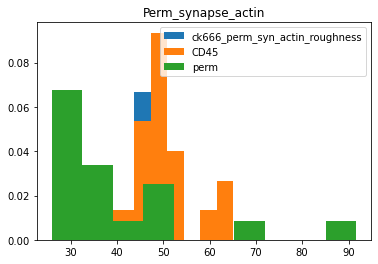

In [83]:


plt.hist(ck666_perm_syn_actin_roughness,bins=10,density=True)
plt.hist(ck666_perm_syn_CD45_roughness,bins=10,density=True)
plt.hist(ck666_perm_syn_perm_roughness,bins=10,density=True)
plt.legend(['ck666_perm_syn_actin_roughness','CD45','perm'])
plt.title('Perm_synapse_actin')
plt.show()

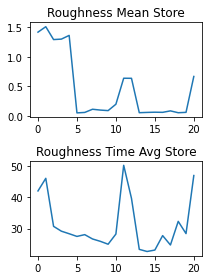

In [84]:
WT_perm_syn_CD45_roughness=final_function('WT_perm_syn_CD45.txt')

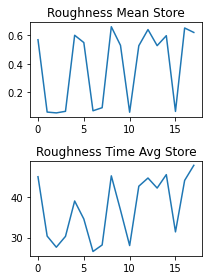

In [85]:
WT_perm_syn_perm_roughness=final_function('WT_perm_syn_perm.txt')

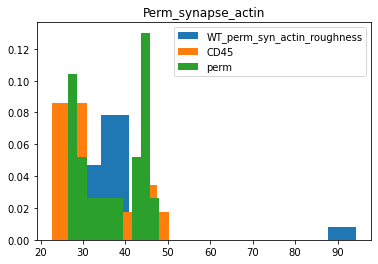

In [86]:
plt.hist(WT_perm_syn_actin_roughness,bins=10,density=True)
plt.hist(WT_perm_syn_CD45_roughness,bins=10,density=True)
plt.hist(WT_perm_syn_perm_roughness,bins=10,density=True)
plt.legend(['WT_perm_syn_actin_roughness','CD45','perm'])
plt.title('Perm_synapse_actin')
plt.show()

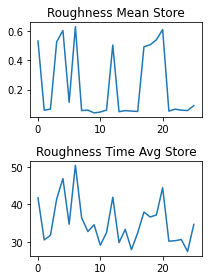

In [87]:
SMIHF2_perm_syn_perm_roughness=final_function('SMIHF2_perm_syn_perm.txt')

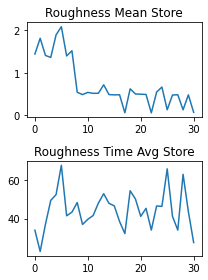

In [88]:
SMIHF2_perm_syn_CD45_roughness=final_function('SMIHF2_perm_syn_CD45.txt')

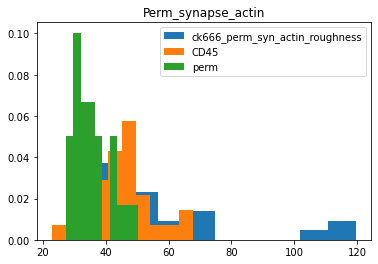

In [89]:

plt.hist(SMIHF2_perm_syn_actin_roughness,bins=10,density=True)
plt.hist(SMIHF2_perm_syn_CD45_roughness,bins=10,density=True)
plt.hist(SMIHF2_perm_syn_perm_roughness,bins=10,density=True)
plt.legend(['ck666_perm_syn_actin_roughness','CD45','perm'])
plt.title('Perm_synapse_actin')
plt.show()

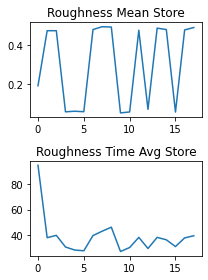

In [90]:
WT_perm_postsyn_actin_roughness=final_function('WT_perm_postsyn_actin.txt')

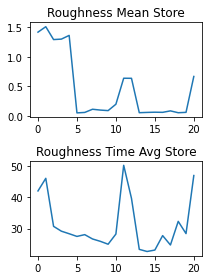

In [91]:
WT_perm_postsyn_CD45_roughness=final_function('WT_perm_postsyn_CD45.txt')

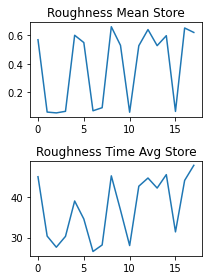

In [92]:
WT_perm_postsyn_perm_roughness=final_function('WT_perm_postsyn_perm.txt')

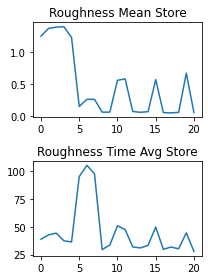

In [93]:
ck666_perm_postsyn_actin_roughness=final_function('CK666_perm_postsyn_actin.txt')

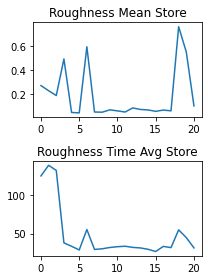

In [94]:
ck666_perm_postsyn_CD45_roughness=final_function('CK666_perm_postsyn_CD45.txt')

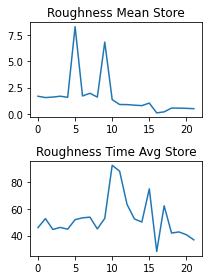

In [95]:
ck666_perm_postsyn_perm_roughness=final_function('CK666_perm_postsyn_perm.txt')

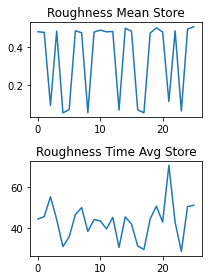

In [62]:
SMIHF2_perm_postsyn_actin_roughness=final_function('SMIHF2_perm_postsyn_actin.txt')

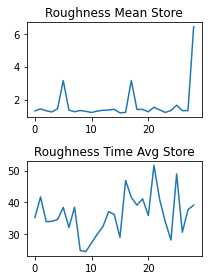

In [63]:
SMIHF2_perm_postsyn_CD45_roughness=final_function('SMIHF2_perm_postsyn_CD45.txt')

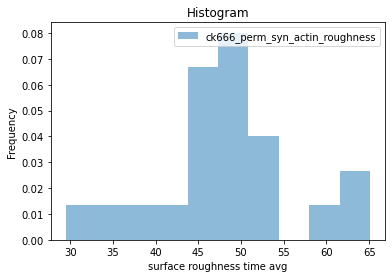

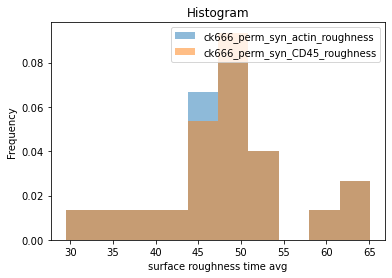

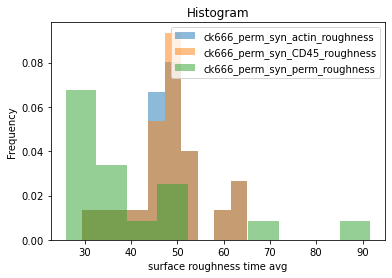

In [104]:
import matplotlib.pyplot as plt
import tkinter as tk


def plot_histogram():
    plt.clf()
    for i, data in enumerate(selected_lists):
        plt.hist(data,bins=10,density=True, alpha=0.5,label=button_names[selected_buttons[i]])
    plt.xlabel('surface roughness time avg')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.legend()
    plt.show()


def button_click(index):
    if index not in selected_buttons:
        selected_buttons.append(index)
        selected_lists.append(lists[index])
    plot_histogram()


# Sample data for demonstration
lists = [
    WT_perm_syn_actin_roughness,
    WT_perm_syn_CD45_roughness,
    WT_perm_syn_perm_roughness,
    WT_perm_postsyn_actin_roughness,
    WT_perm_postsyn_CD45_roughness,
    WT_perm_postsyn_perm_roughness,
    ck666_perm_syn_actin_roughness,
    ck666_perm_syn_CD45_roughness,
    ck666_perm_syn_perm_roughness,
    ck666_perm_postsyn_actin_roughness,
    ck666_perm_postsyn_CD45_roughness,
    ck666_perm_postsyn_perm_roughness,
    SMIHF2_perm_syn_actin_roughness,
    SMIHF2_perm_syn_CD45_roughness,
    SMIHF2_perm_syn_perm_roughness,
    SMIHF2_perm_syn_actin_roughness,
    SMIHF2_perm_postsyn_CD45_roughness,
    
]

button_names = [
'WT_perm_syn_actin_roughness',
'WT_perm_syn_CD45_roughness',
'WT_perm_syn_perm_roughness',
'WT_perm_postsyn_actin_roughness',
'WT_perm_postsyn_CD45_roughness',
'WT_perm_postsyn_perm_roughness',
'ck666_perm_syn_actin_roughness',
'ck666_perm_syn_CD45_roughness',
'ck666_perm_syn_perm_roughness',
'ck666_perm_postsyn_actin_roughness',
'ck666_perm_postsyn_CD45_roughness',
'ck666_perm_postsyn_perm_roughness',
'SMIHF2_perm_syn_actin_roughness',
'SMIHF2_perm_syn_CD45_roughness',
'SMIHF2_perm_syn_perm_roughness',
'SMIHF2_perm_syn_actin_roughness',
'SMIHF2_perm_postsyn_CD45_roughness'
]
# Create the main window
root = tk.Tk()

selected_buttons = []
selected_lists = []

# Create buttons
for i, lst in enumerate(button_names):
    button = tk.Button(root, text=lst, command=lambda index=i: button_click(index))
    button.pack()

# Start the Tkinter event loop
root.mainloop()